**SETA - Q1**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load shakespeare.txt (only first 250 characters)
with open('/content/sample_data/shakespeare.txt', 'r') as file:
    text = file.read()[:250]

# Preprocess the text
tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
tokenizer.fit_on_texts([text])
total_chars = len(tokenizer.word_index) + 1  # Total unique characters

# Convert the text into a sequence of integers
input_sequences = []
next_chars = []
seq_length = 40  # Let's take 40 characters as input sequence

for i in range(0, len(text) - seq_length):
    input_sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

# Convert input sequences to integer sequences
X = np.array([tokenizer.texts_to_sequences([seq])[0] for seq in input_sequences])
y = np.array([tokenizer.texts_to_sequences([next_char])[0][0] for next_char in next_chars])

# Convert output to categorical (one-hot encoding)
y = to_categorical(y, num_classes=total_chars)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=total_chars, output_dim=64, input_length=seq_length))
model.add(SimpleRNN(128, activation='relu', return_sequences=False))  # RNN with ReLU
model.add(Dense(total_chars, activation='softmax'))  # Softmax for multi-class prediction

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X, y, batch_size=64, epochs=100)

# Save the model
model.save('shakespeare_rnn.h5')
# Load the pre-trained model (if available)
pretrained_model = tf.keras.models.load_model('shakespeare_rnn.h5')

def predict_text(seed_text, model, tokenizer, seq_length, num_chars_to_generate=100):
    # Ensure the seed_text is at least seq_length long by padding if necessary
    if len(seed_text) < seq_length:
        seed_text = seed_text.rjust(seq_length)  # Pad with spaces on the left if needed

    for _ in range(num_chars_to_generate):
        # Tokenize the last 'seq_length' characters from the seed_text
        token_list = tokenizer.texts_to_sequences([seed_text[-seq_length:]])[0]

        # Ensure token_list has the correct length (seq_length)
        token_list = np.pad(token_list, (seq_length - len(token_list), 0), 'constant')

        # Reshape for model input
        token_list = np.reshape(token_list, (1, seq_length))

        # Predict the next character
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        # Convert the predicted index back to the corresponding character
        output_char = tokenizer.index_word[predicted[0]]

        # Append the predicted character to the seed_text
        seed_text += output_char

    return seed_text


# Example of generating new text
seed_text = "To be, or not to be, that is the question:\n"
generated_text = predict_text(seed_text, pretrained_model, tokenizer, seq_length, num_chars_to_generate=100)
print(generated_text)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0380 - loss: 3.2917
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2109 - loss: 3.2574
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2451 - loss: 3.2133
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1372 - loss: 3.0644
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2460 - loss: 2.9010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1805 - loss: 2.9285
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1743 - loss: 2.8744
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1701 - loss: 2.8180
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2081 - loss: 2.7515
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2099 - loss: 2.7133
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2406 - loss: 2.6926
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2086 - loss: 2.6519
E

To be, or not to be, that is the question:
rer the,es fyimimeade right edoe,  ieer aserl  oeut ther soires tyes mohur ioet thoulc e,ut tsot c e


**SETA - Q2**

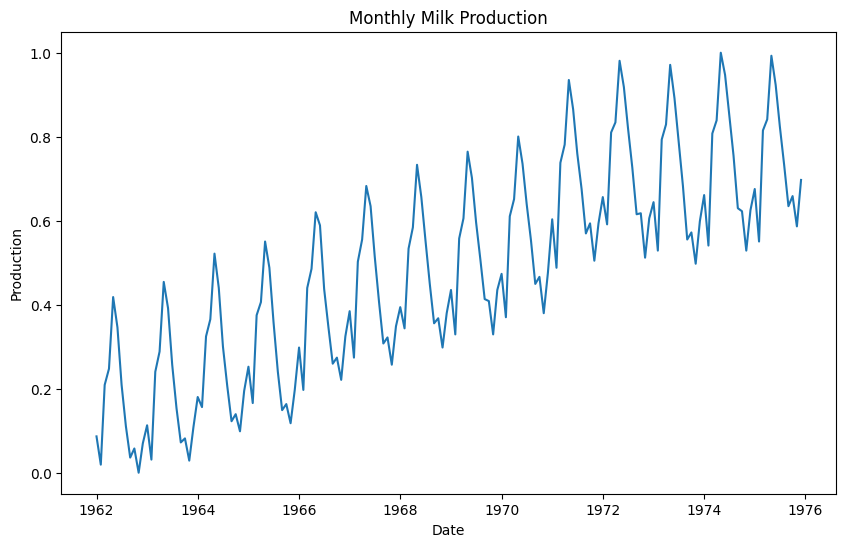

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 - 3s - 378ms/step - loss: 0.1561
Epoch 2/50
8/8 - 0s - 20ms/step - loss: 0.0395
Epoch 3/50
8/8 - 0s - 20ms/step - loss: 0.0314
Epoch 4/50
8/8 - 0s - 33ms/step - loss: 0.0305
Epoch 5/50
8/8 - 0s - 18ms/step - loss: 0.0274
Epoch 6/50
8/8 - 0s - 18ms/step - loss: 0.0254
Epoch 7/50
8/8 - 0s - 17ms/step - loss: 0.0260
Epoch 8/50
8/8 - 0s - 18ms/step - loss: 0.0248
Epoch 9/50
8/8 - 0s - 21ms/step - loss: 0.0245
Epoch 10/50
8/8 - 0s - 16ms/step - loss: 0.0251
Epoch 11/50
8/8 - 0s - 14ms/step - loss: 0.0233
Epoch 12/50
8/8 - 0s - 18ms/step - loss: 0.0239
Epoch 13/50
8/8 - 0s - 17ms/step - loss: 0.0241
Epoch 14/50
8/8 - 0s - 17ms/step - loss: 0.0224
Epoch 15/50
8/8 - 0s - 17ms/step - loss: 0.0223
Epoch 16/50
8/8 - 0s - 24ms/step - loss: 0.0219
Epoch 17/50
8/8 - 0s - 35ms/step - loss: 0.0215
Epoch 18/50
8/8 - 0s - 39ms/step - loss: 0.0208
Epoch 19/50
8/8 - 0s - 38ms/step - loss: 0.0202
Epoch 20/50
8/8 - 0s - 37ms/step - loss: 0.0189
Epoch 21/50
8/8 - 0s - 39ms/step - loss: 0.0177
Epoch 22/50

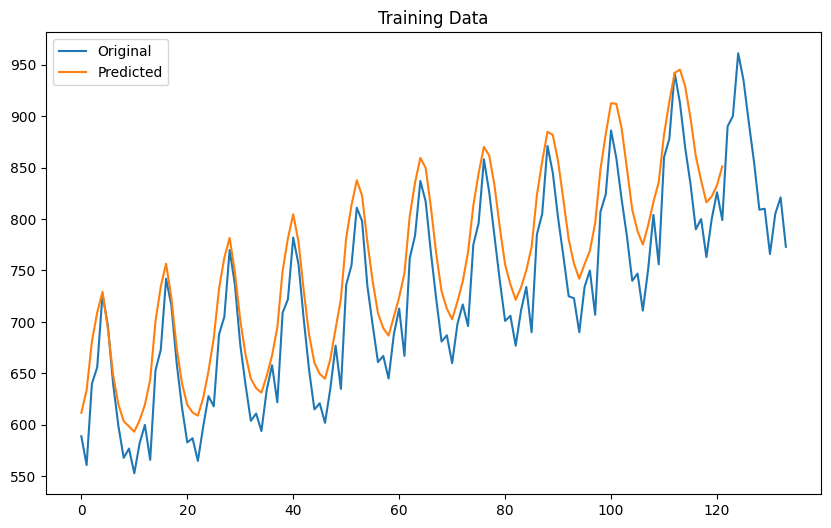

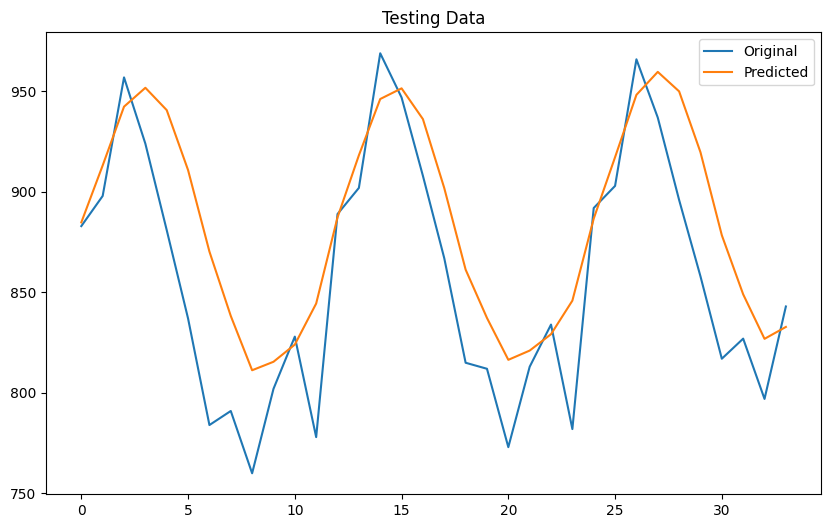

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv('/content/sample_data/monthly_milk_production.csv', index_col='Date', parse_dates=['Date'])

# Scale production
scaler = MinMaxScaler()
df[['Production']] = scaler.fit_transform(df[['Production']])

# Plot original data
plt.figure(figsize=(10,6))
plt.plot(df['Production'])
plt.title('Monthly Milk Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

# Prepare data
train_size = int(len(df) * 0.8)
train_data, test_data = df[0:train_size], df[train_size:len(df)]

# Function to create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data['Production'].values[i:i+seq_len])
        y.append(data['Production'].values[i+seq_len])
    return np.array(X), np.array(y)

# Create sequences
seq_len = 12
X_train, y_train = create_sequences(train_data, seq_len)

# Create test sequences starting from the last train sequence
X_test, y_test = create_sequences(pd.concat([train_data, test_data]), seq_len)
X_test = X_test[-len(test_data):]
y_test = y_test[-len(test_data):]

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
epochs = 50
batch_size = 16
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluate model performance
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')
print(f'Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')

# Plot predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(train_data[['Production']]), label='Original')
plt.plot(scaler.inverse_transform(train_pred), label='Predicted')
plt.title('Training Data')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(test_data[['Production']]), label='Original')
plt.plot(scaler.inverse_transform(test_pred), label='Predicted')
plt.title('Testing Data')
plt.legend()
plt.show()

**SETA - Q3**

Total data points: 3872
Train data size: 3097
Test data size: 775


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 14s - 153ms/step - loss: 0.0011
94/94 - 15s - 158ms/step - loss: 0.0014
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
LSTM Train MSE:  4.995745167716444
LSTM Test MSE:  199.29251187102247
GRU Train MSE:  2.099326362809744
GRU Test MSE:  78.18790131585187


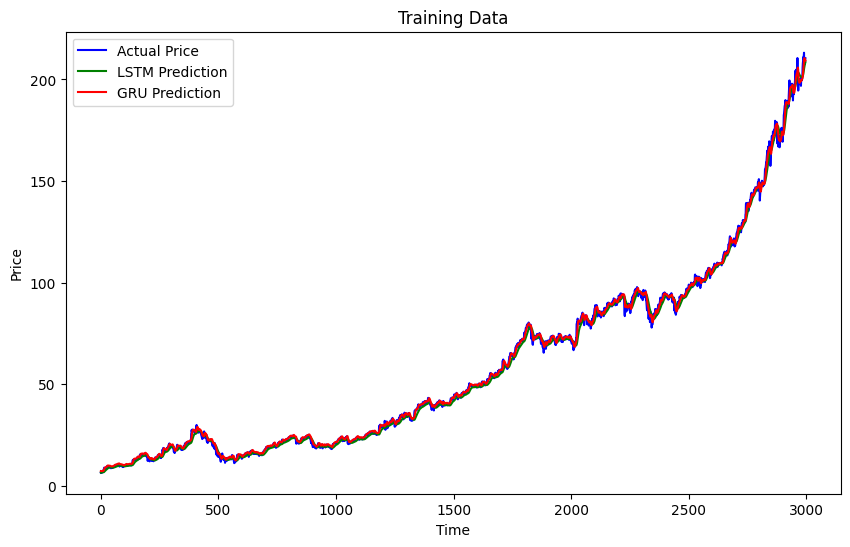

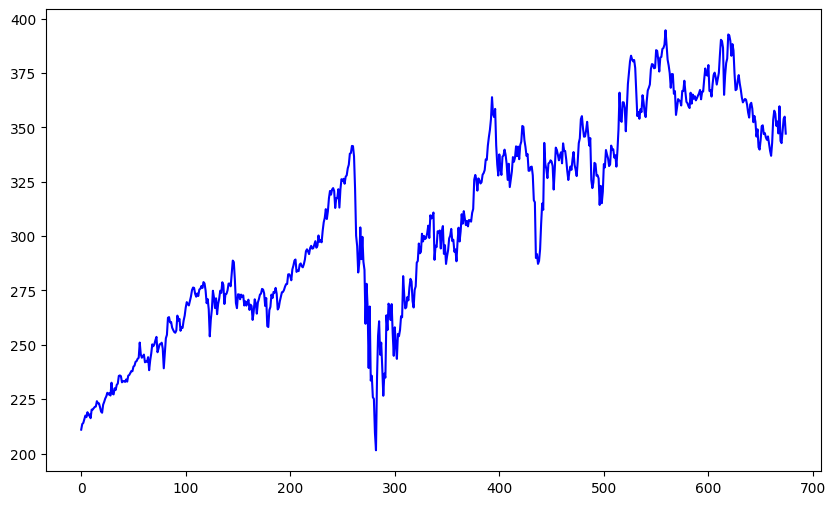

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from CSV file
data = pd.read_csv('/content/sample_data/Mastercard_stock_history.csv')

# Select relevant column (e.g., 'Close')
data = data[['Close']]

# Scale data using Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Check total data points
print("Total data points:", len(data))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

# Check sizes after split
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

# Create input-output pairs
def create_xy(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        a = data['Close'].values[i:(i + time_step)]
        X.append(a)
        y.append(data['Close'].values[i + time_step])
    return np.array(X), np.array(y)

# Creating train/test datasets
time_step = 100
X_train, y_train = create_xy(train_data, time_step)
X_test, y_test = create_xy(test_data, time_step)

# Reshape input data for LSTM and GRU models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# GRU Model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2)

# Train GRU model
model_gru.fit(X_train, y_train, epochs=1, batch_size=32, verbose=2)

# Make predictions using LSTM model
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

# Make predictions using GRU model
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Inverse transform predictions
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

# Calculate Mean Squared Error (MSE)
lstm_train_mse = mean_squared_error(scaler.inverse_transform(y_train), train_predict_lstm)
lstm_test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predict_lstm)
gru_train_mse = mean_squared_error(scaler.inverse_transform(y_train), train_predict_gru)
gru_test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predict_gru)

print("LSTM Train MSE: ", lstm_train_mse)
print("LSTM Test MSE: ", lstm_test_mse)
print("GRU Train MSE: ", gru_train_mse)
print("GRU Test MSE: ", gru_test_mse)

# Plot results for training data
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_train), color='blue', label='Actual Price')
plt.plot(train_predict_lstm, color='green', label='LSTM Prediction')
plt.plot(train_predict_gru, color='red', label='GRU Prediction')
plt.title('Training Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot results for testing data
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), color='blue', label='Actual Price')

**SETA - Q4**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data (list of sentences)
texts = [
    "I love natural language processing",
    "LSTM models are very powerful for sequential data",
    "Embedding layers map words to vectors",
    "Text data requires tokenization before training models",
]

# Parameters
vocab_size = 10000  # Size of the vocabulary (number of unique tokens)
embedding_dim = 64  # Embedding output dimension
sequence_length = 10  # Maximum length of input sequences
lstm_units = 128  # Number of LSTM units

# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to ensure uniform input length
padded_sequences = pad_sequences(sequences, maxlen=sequence_length, padding='post')

# Define the Sequential model
model = Sequential()

# Add Embedding layer to map integer sequences to 64-dimensional vectors
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))

# Add LSTM layer to process the embedded sequences
model.add(LSTM(lstm_units))

# Add a Dense layer for output (this can be modified as per the problem, e.g., classification or regression)
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pass the padded sequences to the model for building it
model.build(input_shape=(None, sequence_length))

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 10, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

**SETB - Q1**

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Simple RNN...
Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 80ms/step - accuracy: 0.5772 - loss: 0.6703 - val_accuracy: 0.7112 - val_loss: 0.5458
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.7526 - loss: 0.5109 - val_accuracy: 0.7272 - val_loss: 0.5417
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7440 - loss: 0.5338
Test Loss: 0.5312755703926086, Test Accuracy: 0.7472000122070312

Training Bidirectional RNN...
Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 99s 136ms/step - accuracy: 0.5306 - loss: 0.6890 - val_accuracy: 0.6056 - val_loss: 0.6452
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.6805 - loss: 0.6000 - val_accuracy: 0.6896 - val_loss: 0.5839
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6918 - loss: 0.5767
Test Loss: 0.5716301202774048, Test Accuracy: 0.6981199979782104

Training Bidirectional LSTM...
Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 172s 237ms/step - ac

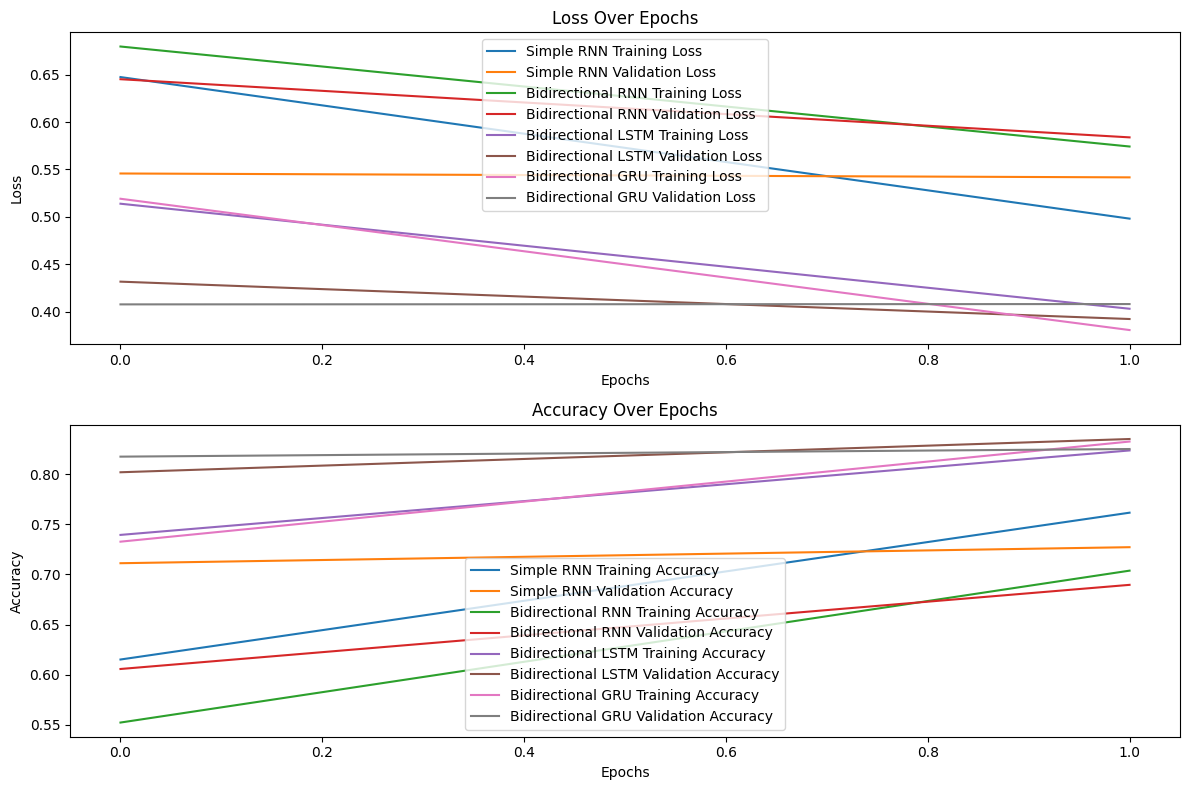


Predictions using Simple RNN:
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
I really enjoyed this movie! -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This was the worst film I've ever seen. -> Positive

Predictions using Bidirectional RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
I really enjoyed this movie! -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This was the worst film I've ever seen. -> Positive

Predictions using Bidirectional LSTM:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
I really enjoyed this movie! -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This was the worst film I've ever seen. -> Positive

Predictions using Bidirectional GRU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
I really enjoyed this movie! -> Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This was the worst film I've ever seen. -> Negative


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load data
max_words = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences
max_length = 300  # Reduced max length for faster training
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Function to create a simple model
def create_model(model_type='simple'):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_length))  # Reduced output_dim
    if model_type == 'simple':
        model.add(SimpleRNN(32))  # Reduced units
    elif model_type == 'bi_rnn':
        model.add(Bidirectional(SimpleRNN(32)))
    elif model_type == 'bi_lstm':
        model.add(Bidirectional(LSTM(32)))
    elif model_type == 'bi_gru':
        model.add(Bidirectional(GRU(32)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_and_evaluate_model(model_fn):
    model = model_fn()
    # Set epochs to 3
    history = model.fit(x_train, y_train, epochs=2, validation_split=0.1, verbose=1)  # Reduced epochs
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
    return model, history

models = {
    "Simple RNN": lambda: create_model('simple'),
    "Bidirectional RNN": lambda: create_model('bi_rnn'),
    "Bidirectional LSTM": lambda: create_model('bi_lstm'),
    "Bidirectional GRU": lambda: create_model('bi_gru'),
}

histories = {}

for model_name, model_fn in models.items():
    print(f"\nTraining {model_name}...")
    model, history = train_and_evaluate_model(model_fn)
    histories[model_name] = history

# Plotting results
plt.figure(figsize=(12, 8))

for model_name, history in histories.items():
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

plt.subplot(2, 1, 1)
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

def predict_sentiment(model, review):
    word_index = imdb.get_word_index()
    review = review.lower()
    review = ''.join([c for c in review if c.isalnum() or c.isspace()])
    words = review.split()

    encoded_review = [word_index.get(word, 0) for word in words if word_index.get(word, 0) < max_words]
    padded_review = pad_sequences([encoded_review], maxlen=max_length)

    prediction = model.predict(padded_review)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

sample_reviews = ["I really enjoyed this movie!", "This was the worst film I've ever seen."]
for model_name, model_fn in models.items():
    print(f"\nPredictions using {model_name}:")
    model = model_fn()
    model.fit(x_train, y_train, epochs=1, validation_split=0.1, verbose=0)
    for review in sample_reviews:
        print(f"{review} -> {predict_sentiment(model, review)}")


Training Simple RNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


459/459 ━━━━━━━━━━━━━━━━━━━━ 118s 250ms/step - accuracy: 0.6718 - loss: 0.7172 - val_accuracy: 0.9320 - val_loss: 0.2383
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9256 - loss: 0.2563
Test Loss: 0.2535436749458313, Test Accuracy: 0.9266122579574585

Training Bidirectional RNN...
459/459 ━━━━━━━━━━━━━━━━━━━━ 225s 483ms/step - accuracy: 0.6826 - loss: 0.7128 - val_accuracy: 0.9274 - val_loss: 0.2442
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.9191 - loss: 0.2633
Test Loss: 0.25717973709106445, Test Accuracy: 0.9225010871887207

Training Bidirectional LSTM...
459/459 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.6842 - loss: 0.7006 - val_accuracy: 0.9409 - val_loss: 0.2159
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9349 - loss: 0.2304
Test Loss: 0.2276850789785385, Test Accuracy: 0.9358471035957336

Training Bidirectional GRU...
459/459 ━━━━━━━━━━━━━━━━━━━━ 997s 2s/step - accuracy: 0.6820 - loss: 0.6920 - val_accuracy: 0.9461 - val_loss: 0.

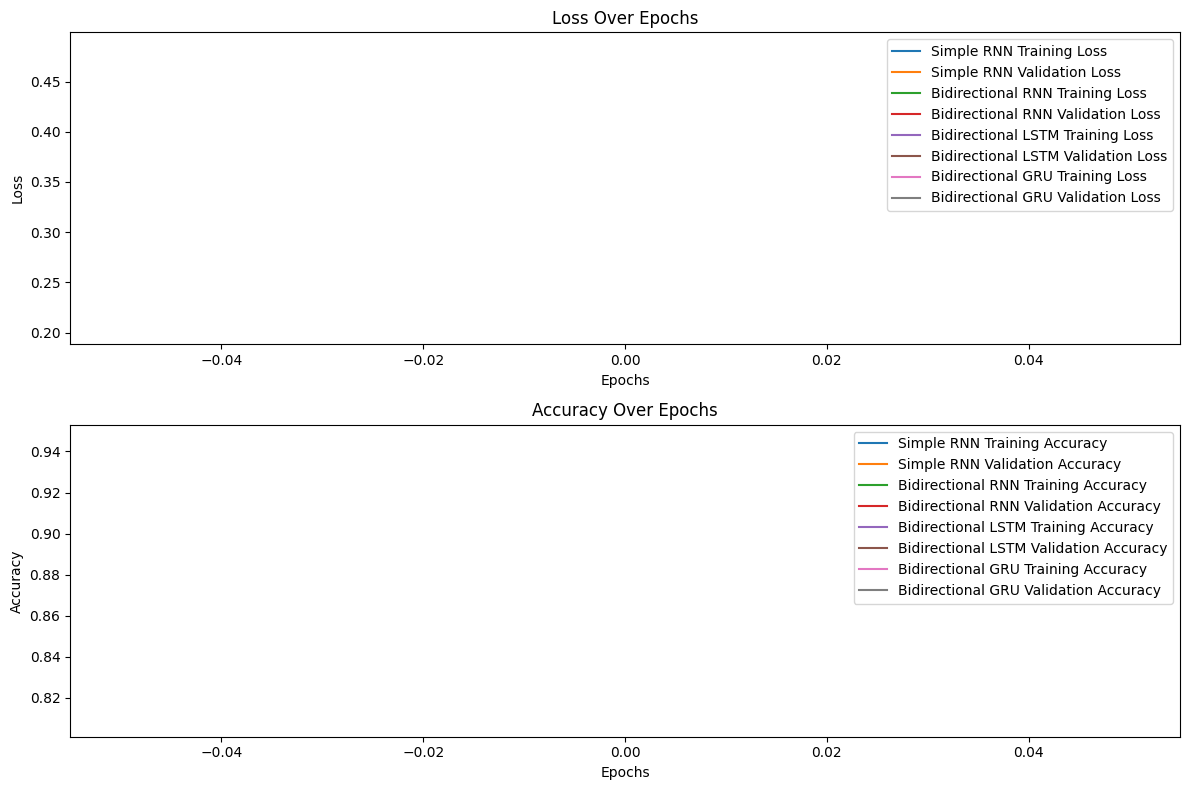


Predictions using Simple RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
i love this product -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
this product is okay -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
i hate this product -> Negative

Predictions using Bidirectional RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
i love this product -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
this product is okay -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i hate this product -> Negative

Predictions using Bidirectional LSTM:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
i love this product -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
this product is okay -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
i hate this product -> Negative

Predictions using Bidirectional GRU:


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load data
data = pd.read_csv('/content/sample_data/Twitter_Data.csv')

# Remove missing values
data = data.dropna()


# Map labels to sentiment categories
sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
data['category'] = data['category'].map(sentiment_map)


# Split data into input texts and labels
texts = data['clean_text']
labels = data['category']


# Convert texts to lowercase and remove special characters
texts = texts.apply(lambda x: x.lower())
texts = texts.apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))


# Create tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)


# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)


# Pad sequences
max_length = 300
padded_sequences = pad_sequences(sequences, maxlen=max_length)


# One-hot encode labels
num_classes = 3
labels_onehot = tf.keras.utils.to_categorical(labels.map({'Negative': 0, 'Neutral': 1, 'Positive': 2}), num_classes)


# Split data into training and testing sets
train_sequences, test_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels_onehot, test_size=0.2, random_state=42)


# Function to create a simple model
def create_model(model_type='simple'):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_length))
    if model_type == 'simple':
        model.add(SimpleRNN(64))
    elif model_type == 'bi_rnn':
        model.add(Bidirectional(SimpleRNN(64)))
    elif model_type == 'bi_lstm':
        model.add(Bidirectional(LSTM(64)))
    elif model_type == 'bi_gru':
        model.add(Bidirectional(GRU(64)))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def train_and_evaluate_model(model_fn):
    model = model_fn()
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001)
    history = model.fit(train_sequences, train_labels, epochs=1,
                    validation_split=0.1, verbose=1,
                    batch_size=256, callbacks=[early_stopping])
    loss, accuracy = model.evaluate(test_sequences, test_labels)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
    return model, history


models = {
    "Simple RNN": lambda: create_model('simple'),
    "Bidirectional RNN": lambda: create_model('bi_rnn'),
    "Bidirectional LSTM": lambda: create_model('bi_lstm'),
    "Bidirectional GRU": lambda: create_model('bi_gru'),
}


histories = {}


for model_name, model_fn in models.items():
    print(f"\nTraining {model_name}...")
    model, history = train_and_evaluate_model(model_fn)
    histories[model_name] = history


# Plotting results
plt.figure(figsize=(12, 8))

for model_name, history in histories.items():
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

plt.subplot(2, 1, 1)
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


def predict_sentiment(model, review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    prediction = model.predict(padded_sequence)
    sentiment_index = np.argmax(prediction[0])
    sentiments = ['Negative', 'Neutral', 'Positive']
    return sentiments[sentiment_index]


sample_reviews = ["I love this product!", "This product is okay.", "I hate this product."]
for model_name, model_fn in models.items():
    print(f"\nPredictions using {model_name}:")
    model = model_fn()
    model.fit(train_sequences, train_labels, epochs=1, validation_split=0.1, verbose=0)
    for review in sample_reviews:
        review = review.lower()
        review = ''.join(e for e in review if e.isalnum() or e.isspace())
        print(f"{review} -> {predict_sentiment(model, review)}")


# Evaluate models using sentiment-specific metrics
for model_name, model_fn in models.items():
    print(f"\nEvaluation using {model_name}:")
    model = model_fn()
    model.fit(train_sequences, train_labels, epochs=10, validation_split=0.1, verbose=0)
    predictions = model.predict(test_sequences)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, predicted_labels))

**SET B - Q2**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
# Normalize images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Reshape data to fit RNN input shape (sequence_length, input_dim)
# For RNN, each row of the image is treated as a time step in the sequence
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(28, 28), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9616 - loss: 0.1357 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9646 - loss: 0.1195 - val_accuracy: 0.9713 - val_loss: 0.1018
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9640 - loss: 0.1224 - val_accuracy: 0.9693 - val_loss: 0.1039
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9676 - loss: 0.1123 - val_accuracy: 0.9743 - val_loss: 0.0960
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9689 - loss: 0.1128 - val_accuracy: 0.9720 - val_loss: 0.1013
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9640 - loss: 0.1371
Test loss: 0.1139088124036789
Test accuracy: 0.9686999917030334
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted digit for the first test sample: 7
Actual digit for the first test sample: 7


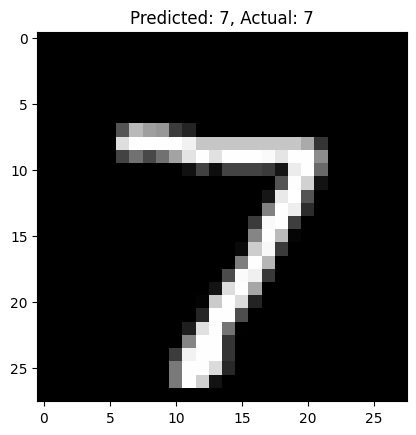

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

# Predict and display some results
predictions = model.predict(x_test)
print("Predicted digit for the first test sample:", np.argmax(predictions[0]))
print("Actual digit for the first test sample:", np.argmax(y_test[0]))

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {np.argmax(y_test[0])}")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('House_price_prediction.csv')

def simple_regression(df):
    X_train, X_test, y_train, y_test = train_test_split(df[['sqft_living']], df['price'], test_size=0.4)

    model = LinearRegression().fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print('Mean Squared Error of Train', mse_train)
    print('Mean Squared Error of Test', mse_test)

    plt.scatter(X_train, y_train, label='Training Set')
    plt.scatter(X_test, y_test, label='Testing Set')
    plt.plot(X_train, y_pred_train, label='Regression')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('Simple Linear Regression')
    plt.show()

simple_regression(df)

FileNotFoundError: [Errno 2] No such file or directory: 'House_price_prediction.csv'